In [1]:
from credmark.cmf.ipython import create_cmf
from credmark.cmf.types import Token, Contract, Address, Account, BlockNumber, Records, JoinType

cmf_param = {
    'chain_id': 1,
    'block_number': 17_000_000,
    'register_utility_global': True
}

context, _model_loader = create_cmf(cmf_param)

We followed the Beginner's Guide for Dune Analytics [1] to implement the dashboard in Cmf [2]

- Query 1: Funds Raised in ETH
- Query 2: Funds raised in USD
- Query 2a: Funds raised in USD at Current ETH Value
- Query 2b: Funds raised in USD at ETH Value at Time of Purchase
- Query 3: Total Number of Supporters
- Query 4a: Leaderboard using the erc721. Abstraction
- Query 4b: Leaderboard using the pooly supporter. Decoded Table
- Query 5: Max Supply and Remaining Supply of Each of the NFT sets
- Query 6: Timeseries Chart of ETH Raised Over Time

[1] https://mirror.xyz/phillan.eth/17VAXsMPpwJg4OQNBHKTYAQTWfJMwFuXZQDAxPStf0o
[2] https://github.com/credmark/credmark-models-py/blob/main/models/contrib/kunlun/pooly_nft.py

In [2]:
# Query 1: Funds Raised in ETH
context.run_model('contrib.pooly-fund-raise')

{'total_raised_qty': 1027.5002165,
 '0x3545192b340f50d77403dc0a64cf2b32f03d00a9': 282.0,
 '0x5663e3e096f1743e77b8f71b5de0cf9dfd058523': 75.0,
 '0x90b3832e2f2ade2fe382a911805b6933c056d6ed': 670.5002165}

In [3]:
# Query 2: Funds raised in USD
# Query 2a: Funds raised in USD at Current ETH Value
# Query 2b: Funds raised in USD at ETH Value at Time of Purchase
# Query 3: Total Number of Supporters
context.run_model('contrib.pooly-fund-raise-usd-and-count')

{'total_supporters': 6338,
 'total_raise_value': 1765532.4951970528,
 'total_raise_value_latest': 1917134.861925959,
 'total_raised_qty': 1027.5002165}

In [4]:
# Query 4a: Leaderboard using the erc721. Abstraction
# Query 4b: Leaderboard using the pooly supporter. Decoded Table
context.run_model('contrib.pooly-fund-raise-leaderboard', {'top_n': 15}, return_type=Records).to_dataframe()

,evt_to,evt_numberOfTokens,evt_amount
0,0xc02052d07a6ca6a90be97d2eaf94562c448d8fa5,1,75.0
1,0x5e5ac1679682a3831aa19f1ac13ec5eea74f09cf,16,16.0
2,0xa30c4b23dcf17be00e0533c2bebb33bbc8ef75d5,13,13.0
3,0x76d76080e5fd807ae15a002f2d44edb2909ae569,19,5.5
4,0xa911ccf5f6c7bd5fb25188d41a536890c3c8fae5,15,4.2
5,0x1ea3697a25a3b1215d3b5e2a69c06f80c8f54d98,5,4.1
6,0x008c84421da5527f462886cec43d2717b686a7e4,4,4.0
7,0xe343e47d821a9bce54f12237426a6ef391066b60,4,4.0
8,0x7957e4959a88bb9767c1db24800ef07b974a7e04,12,3.0
9,0x4754b7e3dede42d71d6c92978f25f306176ec7e9,3,3.0


In [5]:
# Query 5: Max Supply and Remaining Supply of Each of the NFT sets
context.run_model('contrib.pooly-total-supply', return_type=Records).to_dataframe()

,nft,name,supply,max_nft
0,0x5663e3E096f1743e77B8F71b5DE0CF9Dfd058523,Pooly - Judge,1,10
1,0x3545192b340F50d77403DC0A64cf2b32F03d00A9,Pooly - Lawyer,297,1000
2,0x90B3832e2F2aDe2FE382a911805B6933C056D6ed,Pooly - Supporter,6706,10000


<Axes: xlabel='block_time'>

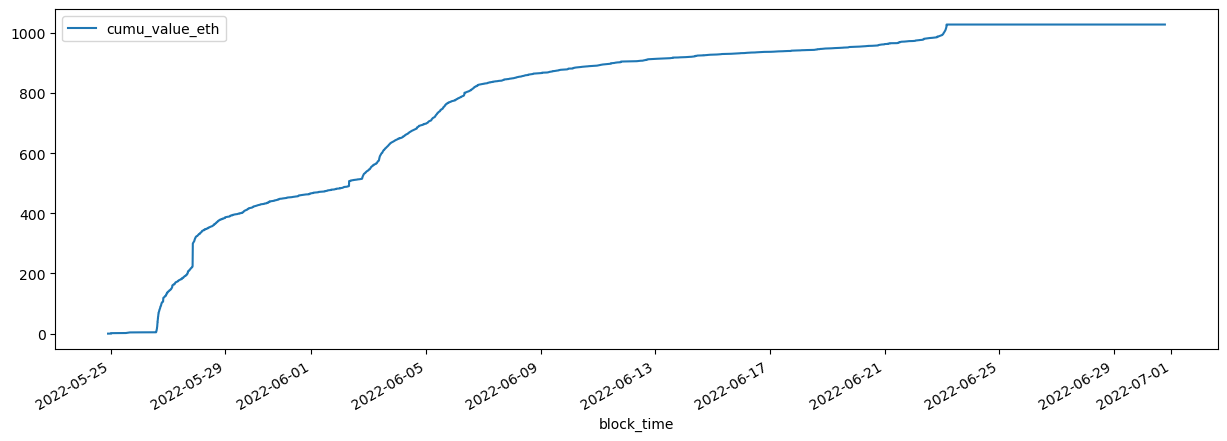

In [6]:
# Query 6: Timeseries Chart of ETH Raised Over Time
df_fund_raise = context.run_model('contrib.pooly-fund-raise-timeseries', return_type=Records).to_dataframe()

(df_fund_raise
 .assign(block_time=lambda x: pd.to_datetime(x.block_time, unit='s'))
 .query('block_time < "2022-07-01"')
 .plot(x='block_time', y='cumu_value_eth', kind='line', figsize=(15, 5)))